In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

dir_path = './data/'
f_app = os.path.join(dir_path + 'application_train.csv')
print(f'The data file is {f_app}')

app_train = pd.read_csv(f_app)
app_train.head()
print(app_train.shape)

The data file is ./data/application_train.csv
(307511, 122)


In [3]:
# 如果欄位中有 NA, describe 會有問題，例如count的部分
print(app_train['AMT_REQ_CREDIT_BUREAU_YEAR'].describe())
print(app_train['AMT_ANNUITY'].describe())

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64
count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


In [4]:
#除去na值，算5個據點值
five_num = [0,25,50,75,100]
quantile_5s =[np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i)for i in five_num]
print(quantile_5s)

[1615.5, 16524.0, 24903.0, 34596.0, 258025.5]


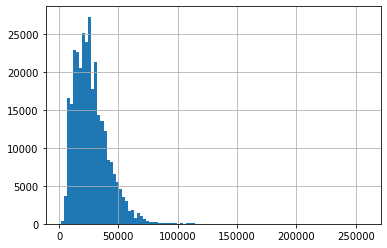

In [9]:
app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'].hist(bins = 100)
plt.show()

In [15]:
#試著將max()值轉為q99
q99 = np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = 99)
app_train[app_train['AMT_ANNUITY'] == app_train['AMT_ANNUITY'].max()] = q99

five_num = [0,25,50,75,100]
quentile_5s = [np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in five_num]
print(quentile_5s)

[1615.5, 16524.0, 24903.0, 34596.0, 220297.5]


In [25]:
#得到中位數的方法
print(np.median(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY']))

<bound method Series.min of 0         24700.5
1         35698.5
2          6750.0
3         29686.5
4         21865.5
           ...   
307506    27558.0
307507    12001.5
307508    29979.0
307509    20205.0
307510    49117.5
Name: AMT_ANNUITY, Length: 307499, dtype: float64>
24903.0


In [61]:
#得到眾數的方法
from scipy.stats import mode 
import time

start_time = time.time()
get_mode = mode(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'])
print(get_mode)
print('Elapsed time : %3f sec.' %(time.time() - start_time))

ModeResult(mode=array([9000.]), count=array([6385]))
Elapsed time : 0.263799 sec.


In [62]:
#得到眾數
#更快的方法
from collections import defaultdict

start_time = time.time()
mode_dict = defaultdict(lambda:0)

for value in app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY']:
    mode_dict[value] += 1

get_mode = sorted(mode_dict.items(),key = lambda kv : kv[1], reverse = True)
print(get_mode[0])
print('Elapsed time : %3f sec' %(time.time() - start_time))

(9000.0, 6385)
Elapsed time : 0.365022 sec


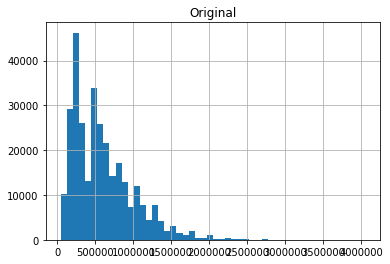

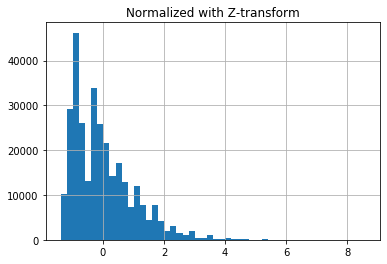

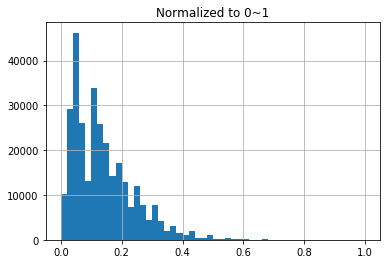

In [70]:
app_train['AMT_CREDIT'].hist(bins = 50)
plt.title('Original')
plt.show()
value = app_train['AMT_CREDIT'].values

app_train['AMT_CREDIT_NORM1']  = (value - np.mean(value))/np.std(value)
app_train['AMT_CREDIT_NORM1'].hist(bins = 50)
plt.title('Normalized with Z-transform')
plt.show()

app_train['AMT_CREDIT_NORM2'] = (value - np.min(value))/(np.max(value) - np.min(value))
app_train['AMT_CREDIT_NORM2'].hist(bins = 50)
plt.title('Normalized to 0~1')
plt.show()

In [88]:
num_100 = np.arange(start = 0,stop = 101)
q_all = (np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'], q = i) for i in num_100)

pd.DataFrame({'q': list(range(101)),
                        'value': q_all })

,q,value
0,0,1615.50
1,1,6182.91
2,2,6750.00
3,3,7875.00
4,4,8703.00
...,...,...
96,96,55624.50
97,97,58482.00
98,98,62964.00
99,99,70006.50


In [96]:
# 2.1 將 NAs 以 q50 填補
print('Before replace NAs,number of row that AMT_ANNUITY is NAs : %i' %sum(app_train['AMT_ANNUITY'].isnull()))

q50 = np.percentile(app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY'],q =50)
app_train.loc[app_train['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = q50

print('After replace NAs,the number of row that AMT_ANNUITY : %i' %sum(app_train['AMT_ANNUITY'].isnull()))

Before replace NAs,number of row that AMT_ANNUITY is NAs : 12
After replace NAs,the number of row that AMT_ANNUITY : 0


In [101]:
# 2.2 Normalize values to -1 to 1
print('== Original data range ==')
print(app_train['AMT_ANNUITY'].describe())

def normalize_value(x):
    value = x.values
    x = 2*(((value - np.min(value))/(value.max() - value.min()))-0.5)
    return x

app_train['AMT_ANNUITY_NORMALIZED'] = normalize_value(app_train['AMT_ANNUITY'])
print('== Normalized data range ==')
print(app_train['AMT_ANNUITY_NORMALIZED'].describe())

== Original data range ==
count    307511.000000
mean      27095.763013
std       14386.568590
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      220297.500000
Name: AMT_ANNUITY, dtype: float64
== Normalized data range ==
count    307511.000000
mean         -0.766965
std           0.131575
min          -1.000000
25%          -0.863651
50%          -0.787020
75%          -0.698370
max           1.000000
Name: AMT_ANNUITY_NORMALIZED, dtype: float64


Before replace NAs,the number of row that AMT_GOODS_PRICE is NAs : 278
450000.0
450000.0
After replace NAs,the number of row that AMT_GOODS_PRICE is NA : 0 .


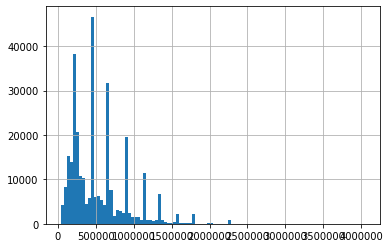

In [116]:
#將 AMT_GOODS_PRICE 的 NAs 以眾數填補
print('Before replace NAs,the number of row that AMT_GOODS_PRICE is NAs : %i' %sum(app_train['AMT_GOODS_PRICE'].isnull()))

from collections import defaultdict
mode_dict = defaultdict(lambda : 0)

for value in app_train[~app_train['AMT_GOODS_PRICE'].isnull()]['AMT_GOODS_PRICE']:
    mode_dict[value] += 1

get_mode = sorted(mode_dict.items(), key = lambda kv:kv[1],reverse = True)
value_most = get_mode[0][0]
print(value_most)

mode_goods_price = list(app_train['AMT_GOODS_PRICE'].value_counts().index)
print(mode_goods_price[0])
app_train.loc[app_train['AMT_GOODS_PRICE'].isnull(),'AMT_GOODS_PRICE'] = mode_goods_price[0]

print('After replace NAs,the number of row that AMT_GOODS_PRICE is NA : %i .' %sum(app_train['AMT_GOODS_PRICE'].isnull()))


app_train['AMT_GOODS_PRICE'].hist(bins = 100)
plt.show()